In [2]:
# --------------------------------------------------------------------------------
# CLASSEUR (Colab) : Hypothèse "Coder"
# --------------------------------------------------------------------------------

############################################
# SECTION 0 : Installation et imports
############################################
############################################
# SECTION 1 : Introduction
############################################

# !pip install datasets pandas matplotlib seaborn
!pip install datasets pandas
!pip install seaborn
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
############################################
# SECTION 2 : Chargement des données
############################################

In [3]:
print("=== Chargement du dataset BigCodeBench ===")
ds = load_dataset("bigcode/bigcodebench-results")
df_full = ds['train'].to_pandas()

print("\nAperçu du dataset original :")
print(df_full.head())

=== Chargement du dataset BigCodeBench ===


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/951 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/9.81k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/163 [00:00<?, ? examples/s]


Aperçu du dataset original :
                          model  \
0           Magicoder-S-DS-6.7B   
1  StarCoder2-15B-Instruct-v0.1   
2                 StarCoder2-3B   
3                 StarCoder2-7B   
4                StarCoder2-15B   

                                                link    moe  size  act_param  \
0  https://huggingface.co/ise-uiuc/Magicoder-S-DS...  False   6.7        6.7   
1  https://huggingface.co/bigcode/starcoder2-15b-...  False  15.0       15.0   
2       https://huggingface.co/bigcode/starcoder2-3b  False   3.0        3.0   
3       https://huggingface.co/bigcode/starcoder2-7b  False   7.0        7.0   
4      https://huggingface.co/bigcode/starcoder2-15b  False  15.0       15.0   

  type  complete  instruct  
0    🔶      47.6      36.2  
1    🔶      45.1      37.6  
2    🟢      21.4       NaN  
3    🟢      27.7       NaN  
4    🟢      38.4       NaN  


In [ ]:
############################################
# SECTION 3 : Filtrer les modèles 'Coder'
############################################

In [4]:
print("\n=== Filtre : modèles contenant 'coder' ===")
df_coder = df_full[df_full['model'].str.contains('coder', case=False, regex=True)].copy()

print(f"Nombre de modèles contenant 'Coder': {len(df_coder)}")
print("Aperçu (quelques lignes) :")
print(df_coder[['model','size','type','complete','instruct']].head(10))


=== Filtre : modèles contenant 'coder' ===
Nombre de modèles contenant 'Coder': 33
Aperçu (quelques lignes) :
                           model  size type  complete  instruct
0            Magicoder-S-DS-6.7B   6.7    🔶      47.6      36.2
1   StarCoder2-15B-Instruct-v0.1  15.0    🔶      45.1      37.6
2                  StarCoder2-3B   3.0    🟢      21.4       NaN
3                  StarCoder2-7B   7.0    🟢      27.7       NaN
4                 StarCoder2-15B  15.0    🟢      38.4       NaN
30      DeepSeek-Coder-1.3B-Base   1.3    🟢      22.2       NaN
31  DeepSeek-Coder-1.3B-Instruct   1.3    🔶      29.6      22.8
32       DeepSeek-Coder-33B-Base  33.0    🟢      46.6       NaN
33   DeepSeek-Coder-33B-Instruct  33.0    🔶      51.1      42.0
34      DeepSeek-Coder-6.7B-Base   6.7    🟢      41.8       NaN


In [ ]:
############################################
# SECTION 4 : Vérifier la présence de scores et stat basiques
############################################

In [5]:
na_instruct = df_coder['instruct'].isna().sum()
print(f"\nNombre de modèles 'Coder' sans score 'instruct' : {na_instruct} / {len(df_coder)}")

# Statistiques descriptives de base
print("\n=== Statistiques descriptives sur 'complete' et 'instruct' (Coder) ===")
print(df_coder[['complete','instruct']].describe())


Nombre de modèles 'Coder' sans score 'instruct' : 11 / 33

=== Statistiques descriptives sur 'complete' et 'instruct' (Coder) ===
        complete   instruct
count  29.000000  22.000000
mean   43.137931  37.177273
std     9.705021   6.195615
min    21.400000  22.800000
25%    38.800000  35.050000
50%    46.500000  37.200000
75%    48.800000  40.625000
max    59.700000  49.000000


In [ ]:
############################################
# SECTION 5 : Visualisation - Distribution des scores
############################################

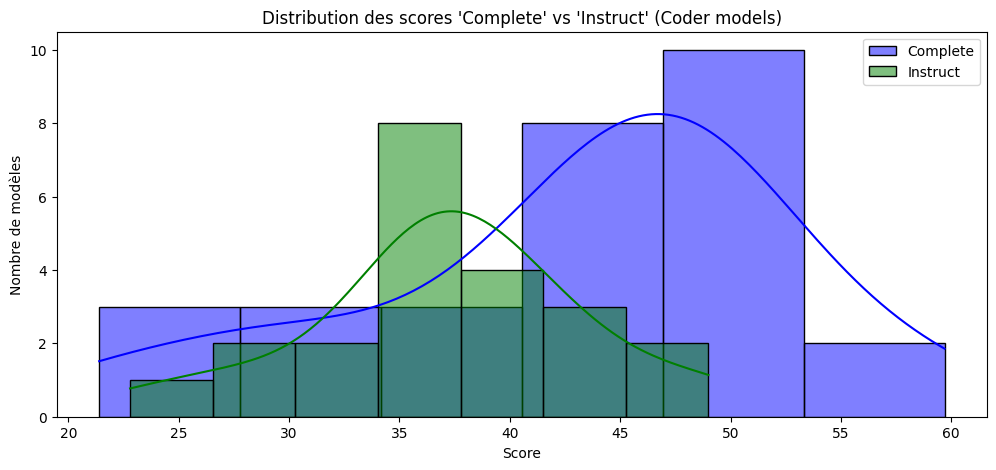

In [6]:
plt.figure(figsize=(12,5))
sns.histplot(df_coder['complete'], color='blue', kde=True, label='Complete')
sns.histplot(df_coder['instruct'], color='green', kde=True, label='Instruct')
plt.title("Distribution des scores 'Complete' vs 'Instruct' (Coder models)")
plt.xlabel("Score")
plt.ylabel("Nombre de modèles")
plt.legend()
plt.show()

In [ ]:
############################################
# SECTION 6 : Calculer et analyser l'écart 'complete - instruct'
############################################


=== Aperçu de l'écart (score_gap) pour 5 modèles ===
                          model  complete  instruct  score_gap
0           Magicoder-S-DS-6.7B      47.6      36.2       11.4
1  StarCoder2-15B-Instruct-v0.1      45.1      37.6        7.5
2                 StarCoder2-3B      21.4       NaN        NaN
3                 StarCoder2-7B      27.7       NaN        NaN
4                StarCoder2-15B      38.4       NaN        NaN


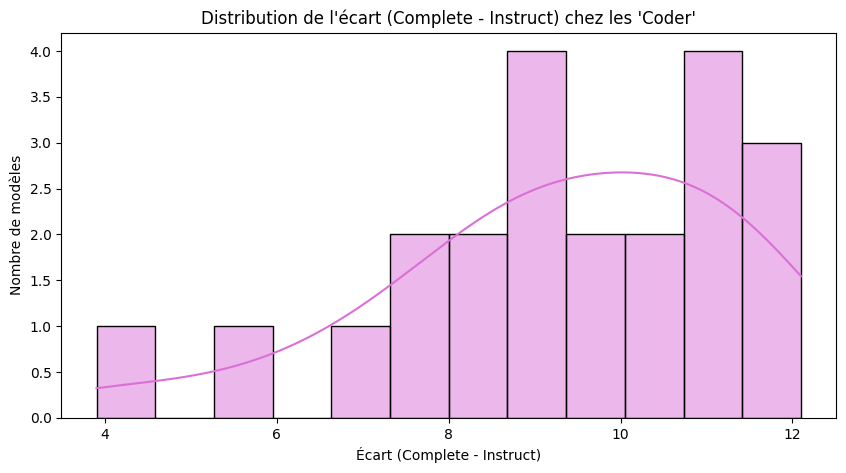


=== Modèle 'Coder' avec l'écart le plus grand (Complete >> Instruct) : ===
model        ReflectionCoder-CL-7B
complete                      40.5
instruct                      28.4
score_gap                     12.1
Name: 85, dtype: object

=== Modèle 'Coder' avec l'écart le plus faible (voire Instruct > Complete) : ===
model        OpenCoder-1.5B-Instruct
complete                        38.8
instruct                        34.9
score_gap                        3.9
Name: 144, dtype: object


In [7]:

df_coder['score_gap'] = df_coder['complete'] - df_coder['instruct']

# Afficher quelques échantillons pour voir l'écart
print("\n=== Aperçu de l'écart (score_gap) pour 5 modèles ===")
print(df_coder[['model','complete','instruct','score_gap']].head(5))

# Distribution de l'écart
plt.figure(figsize=(10,5))
sns.histplot(df_coder['score_gap'], bins=12, color='orchid', kde=True)
plt.title("Distribution de l'écart (Complete - Instruct) chez les 'Coder'")
plt.xlabel("Écart (Complete - Instruct)")
plt.ylabel("Nombre de modèles")
plt.show()

# Identifier le top et bottom
idx_gap_max = df_coder['score_gap'].idxmax()
idx_gap_min = df_coder['score_gap'].idxmin()

print("\n=== Modèle 'Coder' avec l'écart le plus grand (Complete >> Instruct) : ===")
print(df_coder.loc[idx_gap_max, ['model','complete','instruct','score_gap']])

print("\n=== Modèle 'Coder' avec l'écart le plus faible (voire Instruct > Complete) : ===")
print(df_coder.loc[idx_gap_min, ['model','complete','instruct','score_gap']])

In [ ]:
############################################
# SECTION 7 : Visualiser l'écart par modèle
############################################

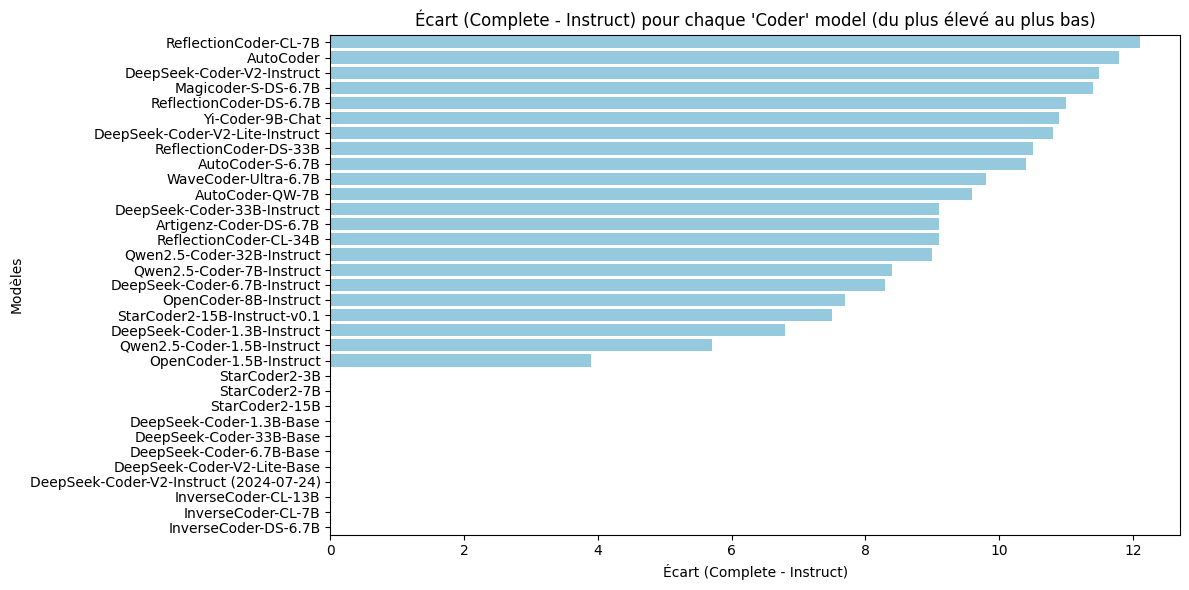

In [8]:
# Tri des modèles par écart pour lisibilité
df_coder_sorted = df_coder.sort_values('score_gap', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=df_coder_sorted, x='score_gap', y='model', color='skyblue')
plt.title("Écart (Complete - Instruct) pour chaque 'Coder' model (du plus élevé au plus bas)")
plt.xlabel("Écart (Complete - Instruct)")
plt.ylabel("Modèles")
plt.tight_layout()
plt.show()

In [ ]:
############################################
# SECTION 8 : Corrélation entre Complete et Instruct
############################################

In [9]:
corr_ci = df_coder[['complete','instruct']].corr().iloc[0,1]
print(f"\nCorrélation 'complete' <-> 'instruct' (Coder only) = {corr_ci:.3f}")


Corrélation 'complete' <-> 'instruct' (Coder only) = 0.960


In [ ]:
############################################
# SECTION 9 : Influence de la taille sur la performance
############################################


=== Moyennes par catégorie de taille (Coder) ===
               complete  instruct  score_gap
size_category                               
Large             59.70     48.20      11.50
Medium            46.96     40.89       9.69
Small             40.09     34.54       8.94


<ipython-input-10-62ab2213b2cc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-62ab2213b2cc>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


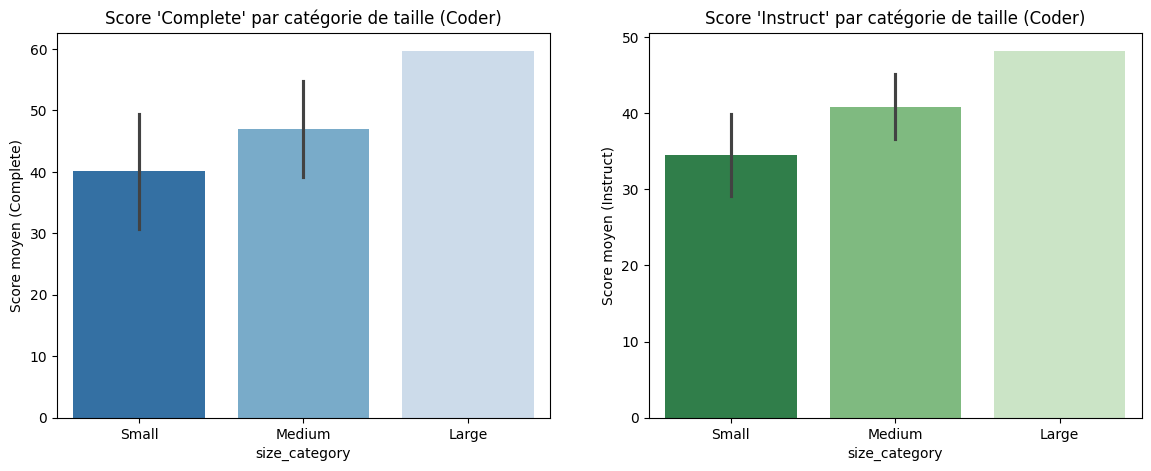

<ipython-input-10-62ab2213b2cc>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_coder, x='size_category', y='score_gap', palette='viridis')


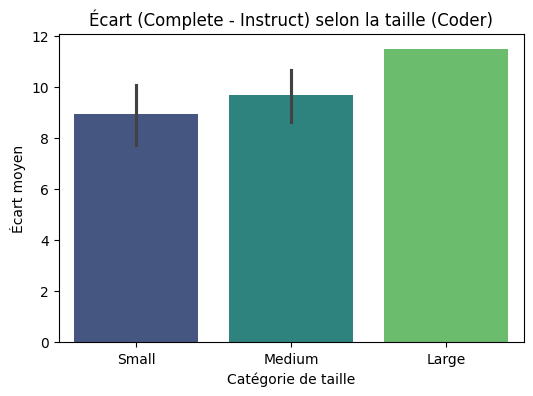

In [10]:
def categorize_size(x):
    if pd.isna(x):
        return "Unknown"
    elif x < 10:
        return "Small"
    elif x < 50:
        return "Medium"
    else:
        return "Large"

df_coder['size_category'] = df_coder['size'].apply(categorize_size)

# Moyennes de complete, instruct, gap par catégorie
size_stats = (
    df_coder.groupby('size_category')[['complete','instruct','score_gap']]
    .mean()
    .round(2)
)
print("\n=== Moyennes par catégorie de taille (Coder) ===")
print(size_stats)

# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(
    data=df_coder,
    x='size_category',
    y='complete',
    errorbar='sd',
    ax=ax[0],
    palette='Blues_r'
)
ax[0].set_title("Score 'Complete' par catégorie de taille (Coder)")
ax[0].set_ylabel("Score moyen (Complete)")

sns.barplot(
    data=df_coder,
    x='size_category',
    y='instruct',
    errorbar='sd',
    ax=ax[1],
    palette='Greens_r'
)
ax[1].set_title("Score 'Instruct' par catégorie de taille (Coder)")
ax[1].set_ylabel("Score moyen (Instruct)")

plt.show()

# Gap par catégorie
plt.figure(figsize=(6,4))
sns.barplot(data=df_coder, x='size_category', y='score_gap', palette='viridis')
plt.title("Écart (Complete - Instruct) selon la taille (Coder)")
plt.xlabel("Catégorie de taille")
plt.ylabel("Écart moyen")
plt.show()


In [ ]:
############################################
# SECTION 10 : Comparaison à l’échantillon non-'Coder' (facultatif)
############################################

In [11]:
df_non_coder = df_full[~df_full['model'].str.contains('coder', case=False, regex=True)].copy()
df_non_coder['score_gap'] = df_non_coder['complete'] - df_non_coder['instruct']

mean_gap_coder    = df_coder['score_gap'].mean()
mean_gap_noncoder = df_non_coder['score_gap'].mean()

print("\n=== Comparaison 'Coder' vs. 'Non-Coder' sur l'écart (Complete - Instruct) ===")
print(f"Moy. gap (Coder)    = {mean_gap_coder:.2f}")
print(f"Moy. gap (NonCoder) = {mean_gap_noncoder:.2f}")


=== Comparaison 'Coder' vs. 'Non-Coder' sur l'écart (Complete - Instruct) ===
Moy. gap (Coder)    = 9.29
Moy. gap (NonCoder) = 9.28


In [13]:
from scipy.stats import ttest_ind, mannwhitneyu

# Test de normalité
from scipy.stats import shapiro
print("Normalité des écarts (Coder):", shapiro(df_coder['score_gap']))
print("Normalité des écarts (Non-Coder):", shapiro(df_non_coder['score_gap']))

# Test de Student ou Mann-Whitney U selon les cas
if shapiro(df_coder['score_gap']).pvalue > 0.05 and shapiro(df_non_coder['score_gap']).pvalue > 0.05:
    stat, p = ttest_ind(df_coder['score_gap'], df_non_coder['score_gap'])
    print(f"T-test : Stat={stat:.3f}, p={p:.3f}")
else:
    stat, p = mannwhitneyu(df_coder['score_gap'], df_non_coder['score_gap'])
    print(f"Mann-Whitney U : Stat={stat:.3f}, p={p:.3f}")


Normalité des écarts (Coder): ShapiroResult(statistic=nan, pvalue=nan)
Normalité des écarts (Non-Coder): ShapiroResult(statistic=nan, pvalue=nan)
Mann-Whitney U : Stat=nan, p=nan


In [14]:
# Variance intra-groupe
variance_coder = df_coder[['complete', 'instruct']].var()
variance_non_coder = df_non_coder[['complete', 'instruct']].var()

print("Variance (Coder):")
print(variance_coder)
print("Variance (Non-Coder):")
print(variance_non_coder)


Variance (Coder):
complete    94.187438
instruct    38.385649
dtype: float64
Variance (Non-Coder):
complete    125.401027
instruct     77.296588
dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


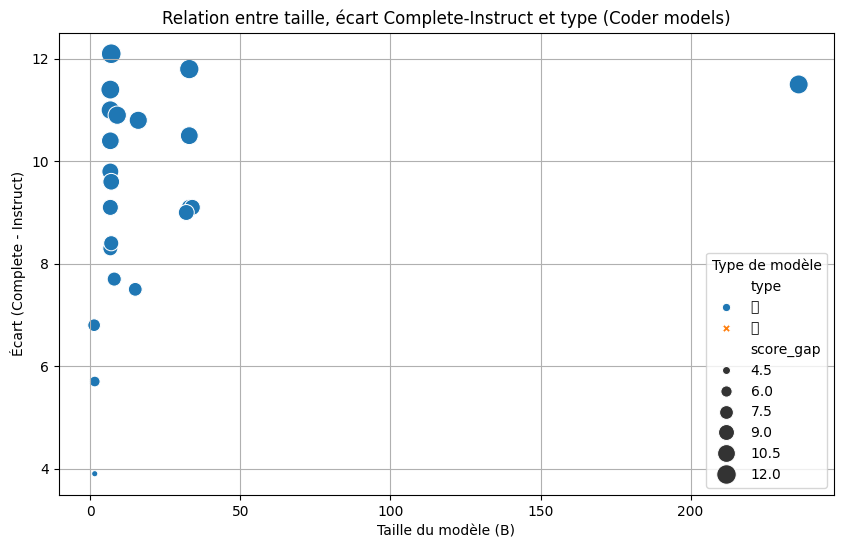

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_coder, x='size', y='score_gap', hue='type', style='type', size='score_gap', sizes=(20, 200)
)
plt.title("Relation entre taille, écart Complete-Instruct et type (Coder models)")
plt.xlabel("Taille du modèle (B)")
plt.ylabel("Écart (Complete - Instruct)")
plt.legend(title="Type de modèle")
plt.grid(True)
plt.show()


<ipython-input-16-af94b6cf89a3>:10: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-af94b6cf89a3>:10: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


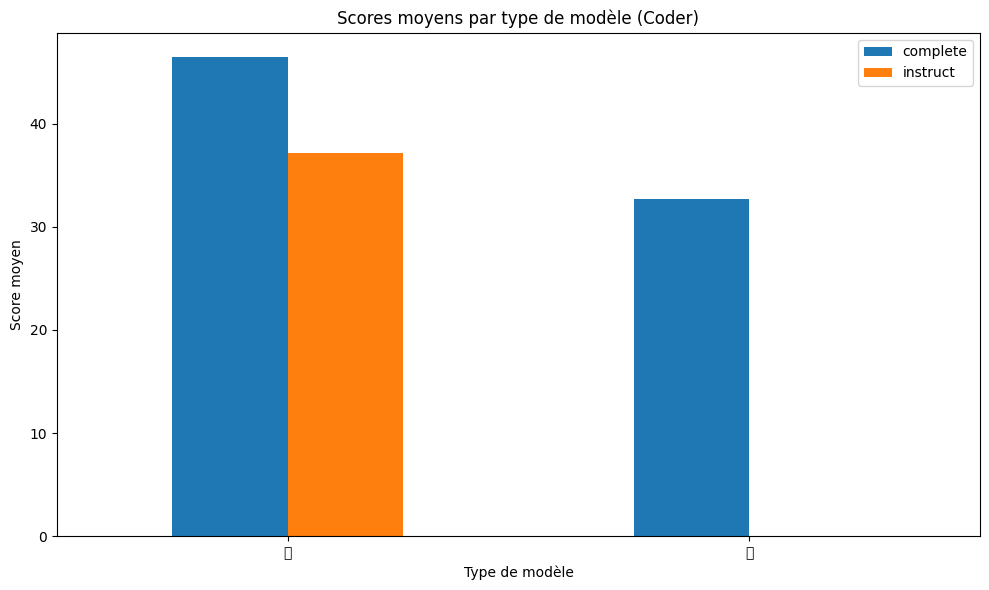

In [16]:
# Moyennes par type
type_means = df_coder.groupby('type')[['complete', 'instruct']].mean().round(2)

# Visualisation
type_means.plot(kind='bar', figsize=(10, 6))
plt.title("Scores moyens par type de modèle (Coder)")
plt.ylabel("Score moyen")
plt.xlabel("Type de modèle")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-17-21ca28e8bee7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_coder['score_gap'], label="Coder", shade=True, color='blue')
<ipython-input-17-21ca28e8bee7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_coder['score_gap'], label="Non-Coder", shade=True, color='green')


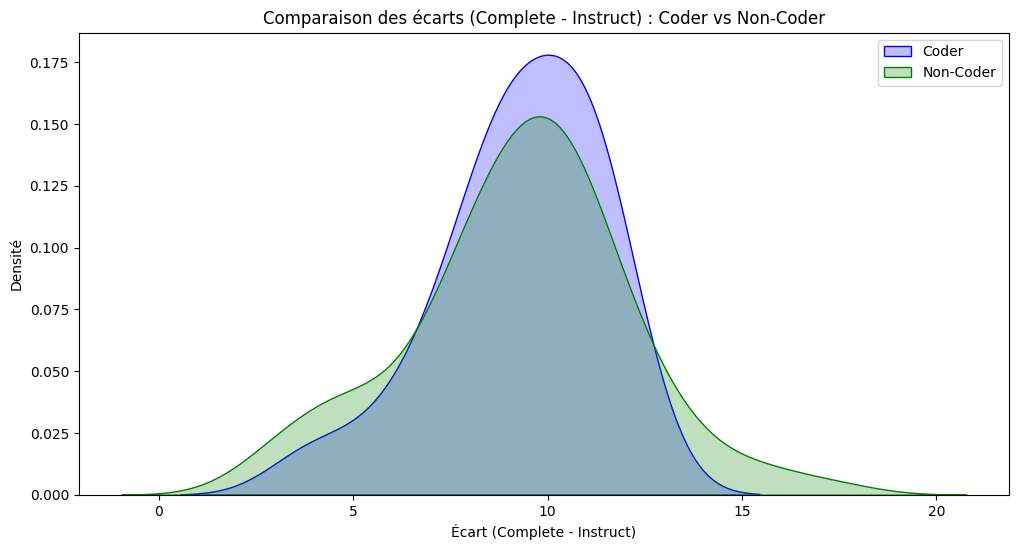

In [17]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_coder['score_gap'], label="Coder", shade=True, color='blue')
sns.kdeplot(df_non_coder['score_gap'], label="Non-Coder", shade=True, color='green')
plt.title("Comparaison des écarts (Complete - Instruct) : Coder vs Non-Coder")
plt.xlabel("Écart (Complete - Instruct)")
plt.ylabel("Densité")
plt.legend()
plt.show()


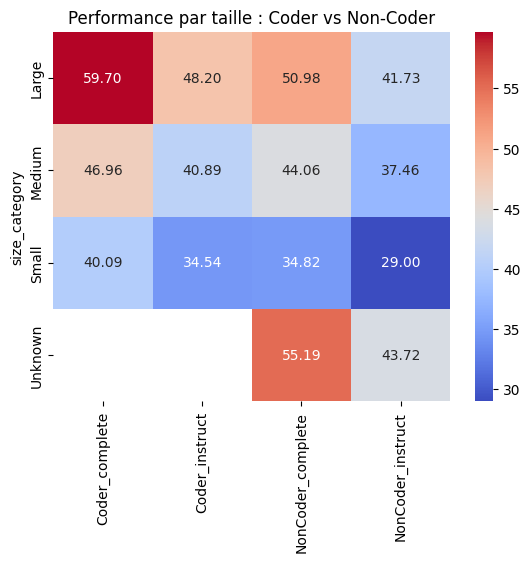

In [21]:
# Moyennes par taille pour chaque groupe

df_non_coder = df_full[~df_full['model'].str.contains('coder', case=False, regex=True)].copy()
df_non_coder['score_gap'] = df_non_coder['complete'] - df_non_coder['instruct']

# Add this line to create 'size_category' for df_non_coder:
df_non_coder['size_category'] = df_non_coder['size'].apply(categorize_size)

mean_gap_coder    = df_coder['score_gap'].mean()
mean_gap_noncoder = df_non_coder['score_gap'].mean()

# Calculate non_coder_size_means here:
non_coder_size_means = df_non_coder.groupby('size_category')[['complete', 'instruct']].mean().round(2)

# Fusion pour heatmap
heatmap_data = pd.concat(
    [coder_size_means.rename(columns=lambda x: f"Coder_{x}"),
     non_coder_size_means.rename(columns=lambda x: f"NonCoder_{x}")],
    axis=1
)

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Performance par taille : Coder vs Non-Coder")
plt.show()

In [22]:
from scipy.stats import ttest_ind, mannwhitneyu

# Test de normalité (Shapiro)
print("Normalité des écarts (Coder):", shapiro(df_coder['score_gap']))
print("Normalité des écarts (Non-Coder):", shapiro(df_non_coder['score_gap']))

# Test de comparaison
if shapiro(df_coder['score_gap']).pvalue > 0.05 and shapiro(df_non_coder['score_gap']).pvalue > 0.05:
    stat, p = ttest_ind(df_coder['score_gap'], df_non_coder['score_gap'])
    print(f"T-test : Stat={stat:.3f}, p={p:.3f}")
else:
    stat, p = mannwhitneyu(df_coder['score_gap'], df_non_coder['score_gap'])
    print(f"Mann-Whitney U : Stat={stat:.3f}, p={p:.3f}")


Normalité des écarts (Coder): ShapiroResult(statistic=nan, pvalue=nan)
Normalité des écarts (Non-Coder): ShapiroResult(statistic=nan, pvalue=nan)
Mann-Whitney U : Stat=nan, p=nan


In [23]:
variance_coder = df_coder[['complete', 'instruct']].var()
variance_non_coder = df_non_coder[['complete', 'instruct']].var()
print("Variance (Coder):")
print(variance_coder)
print("Variance (Non-Coder):")
print(variance_non_coder)


Variance (Coder):
complete    94.187438
instruct    38.385649
dtype: float64
Variance (Non-Coder):
complete    125.401027
instruct     77.296588
dtype: float64


In [ ]:
############################################
# SECTION 11 : Conclusion
############################################

In [ ]:
"""
## Conclusion (Hypothèse 'Coder')

- **Écart entre 'Complete' et 'Instruct'**
  Les modèles labellisés "Coder" affichent en moyenne un écart de X (calculé ci-dessus).
  Par comparaison, les modèles non-"Coder" ont un écart de Y.
  Cela suggère que l'effet du fine-tuning instructionnel (ou l'inadéquation de certains prompts)
  est plus/moins prononcé pour les modèles "Coder".

- **Influence de la taille**
  Les grands modèles 'Coder' (catégorie Large) ont des scores 'Complete' situés autour de ~...,
  et 'Instruct' autour de ~..., entraînant un écart de ~... .
  Les petits modèles ont moins de variance, etc.

- **Corrélation**
  Nous avons relevé une corrélation 'complete' vs 'instruct' de ~0.96
  (similaire à l'échantillon global), indiquant que, globalement,
  un modèle bon en 'complete' a de fortes chances d'être compétent en 'instruct'.

**Perspectives :**
- Analyser plus finement pourquoi certains modèles "Coder" (ex. DeepSeek-Coder-V2)
  présentent un écart particulièrement élevé entre Complete et Instruct.
- Tenir compte des données exactes de pré-entraînement (combien de code vs. instruction)
  pour expliquer ces écarts.
- Comparer les performances multi-langages si disponibles (Python, Java, etc.)
  pour voir si l'orientation "Coder" se concentre surtout sur un ou deux langages.

Ce notebook valide en partie l'idée que les "Coder" models,
déjà spécialisés en génération de code, manifestent un comportement spécifique
quant à l'impact du fine-tuning instructionnel.
Ils restent toutefois cohérents avec la tendance générale
où 'complete' > 'instruct' dans bon nombre de cas, et où la taille influe fortement.
"""